<a href="https://colab.research.google.com/github/nowkoai/twnow/blob/main/tw1130.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ① Twitterで指定キーワードの検索結果を収集

In [408]:
import tweepy
import pandas as pd
import datetime

In [409]:
###########################################################
# TwitterのAPIキー
CONSUMER_KEY="CONSUMER_KEYを入力"
CONSUMER_SECRET="CONSUMER_SECRETを入力"
ACCESS_TOKEN="ACCESS_TOKENを入力"
ACCESS_SECRET="ACCESS_SECERETを入力"
###########################################################


In [410]:
# Twitter APIインスタンス作成
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth)

In [411]:
# Twitterの検索キーワード（リツィート、リプライを除く）
q = f"自民党 exclude:retweets -filter:replies"

In [412]:
# Tweetデータを格納するリスト
tweet_data = []

# Tweetデータの取得（ID/ユーザー名/★Tweerデータ/Text/いいね数/リツィート数）
for tweet in tweepy.Cursor(api.search, q=q, result_type='recent',locale="ja",lang="ja",include_entities=False,count=100).items(100):
    tweet_data.append([tweet.id_str,
                       tweet.user.screen_name,
                       tweet.created_at+datetime.timedelta(hours=9),
                       tweet.text.replace('\n',''),
                       tweet.favorite_count,
                       tweet.retweet_count])

In [413]:
# カラムを280文字幅に設定
pd.set_option("display.max_colwidth", 280)

In [414]:
# データ列名
columns_name=["TW_NO","USER_NAME","TW_TIME","TW_TEXT","FAV","RT"]
#データフレーム化
df=pd.DataFrame(tweet_data,columns=columns_name)

In [415]:
df

,TW_NO,USER_NAME,TW_TIME,TW_TEXT,FAV,RT
0,1465571987879718912,RYOUMA_MI6,2021-11-30 15:42:45,民医連=共産党系😅移民政策推進では自民党も共産党も利害が一致🤔#移民政策#自民党 #共産党 #売国 https://t.co/y7pqMeJsqn,0,0
1,1465571930405486592,onnnakottoso,2021-11-30 15:42:31,ゲイみんなが同性婚を望んでるわけじゃない←事実ゲイみんながカミングアウトを望んでるわけじゃない←事実ゲイにも自民党支持者は多い←事実事実だけ言ってりゃいいのに、なぜどうしてゲイリブ アンチは嘘や陰謀論をねじ込んだツイートをするのだろうか。。。,0,0
2,1465571885127639042,hitomaroaka,2021-11-30 15:42:21,さて日常に戻りましょう。維新と組む #立憲民主党 なんて害悪でしかない。#共産党 も信頼できなくなった今は #社民党 と #れいわ新選組 だけが頼りだ。自民党と維新に抵抗するには、社民とれいわしかない、応援してゆきますよ👍#参議院選挙2022#社民党 #れいわ新選組,0,0
3,1465571787958194178,neibeuqihc,2021-11-30 15:41:57,「選挙は毎回行く、政治ニュースもヘッドラインはちゃんと追っている、政権倒れろとは全く思わんが、細かい不満はめっちゃある、自民党1強は微妙だなあ」というリテラシーレベルでも、立憲民主党の党首選、死ぬほどどうでもいいな,0,0
4,1465571753917239301,TQ2wxOBTRwE9NBG,2021-11-30 15:41:49,🍄何故「労働組合に過ぎない連合」がここまで政治に口を出すのか？🍄なんで連合は自民党の応援団になったのか？不思議でしょうね。💥共産党は許さないとか言うのは口実で、「原発廃棄」・「原発許さぬ」VS 「原発村」・「自民財… https://t.co/gQthabuosD,0,0
...,...,...,...,...,...,...
95,1465568373710868481,akoustam,2021-11-30 15:28:23,これで共産党路線を目指すノイジーマイノリティ派は分裂して出て行ってもらい、タマキンと合併して『北欧型高福祉高負担・医療費教育費無料・消費税 30%』を基本政策にした党を作って、『日本型中福祉中負担』の自民党と差別化出来れば、政権に… https://t.co/1sMQ62LLmF,3,0
96,1465568359760596993,86akita,2021-11-30 15:28:20,自民党の上になってる人にまともなのは高市さんしかいないのか…😭まじ普通に考えたら絶対アカンだろって怒 https://t.co/UJpOTABq2Q,0,0
97,1465568289027878919,adventure___man,2021-11-30 15:28:03,立憲共産党の新党首に泉健太氏。まったく期待もなくただただ、ふーん、と言う感じでしかない。まずは就任の会見挨拶で枝野前党首が「（自民党に対して）代表選挙は17時以降にやっていただきたい」と発言していたことへのブーメランに… https://t.co/LO7ciBQZpJ,4,0
98,1465568275325095938,yukikobehappy,2021-11-30 15:28:00,「きれいな自民党」的立憲民主党の誕生ってことで歓迎します。,1,0


### ② Twitterデータの前処理

In [416]:
!pip install emoji

In [417]:
# 絵文字を削除
import emoji

def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)


# ツイートを整形する（不要な文字を削除する！）
# 形態素解析する前に、必要に応じて追記
def format_df_text(text_col,df):
    df['temp'] = df[text_col].replace(r'https?://[w/:%#$&?()~.=+-…]+', '', regex=True) #画像へのリンクを削除
    df['temp'] = df['temp'].replace(r'@[w/:%#$&?()~.=+-…]+', '', regex=True) #'@'によるメンションを削除
    df['temp'] = df['temp'].replace(r'#(\w+)', '', regex=True) #ハッシュタグ(半角)を削除
    df['temp'] = df['temp'].replace(r'＃(\w+)', '', regex=True) #ハッシュタグ(全角)を削除
    df['temp'] = df['temp'].apply(lambda x: remove_emoji(x)) #🐶のような絵文字を削除
    
    return df['temp']

In [418]:
# Tweetデータの前処理
df['TW_TEXT_mod'] = format_df_text('TW_TEXT',df)

In [419]:
df

,TW_NO,USER_NAME,TW_TIME,TW_TEXT,FAV,RT,temp,TW_TEXT_mod
0,1465571987879718912,RYOUMA_MI6,2021-11-30 15:42:45,民医連=共産党系😅移民政策推進では自民党も共産党も利害が一致🤔#移民政策#自民党 #共産党 #売国 https://t.co/y7pqMeJsqn,0,0,民医連=共産党系移民政策推進では自民党も共産党も利害が一致,民医連=共産党系移民政策推進では自民党も共産党も利害が一致
1,1465571930405486592,onnnakottoso,2021-11-30 15:42:31,ゲイみんなが同性婚を望んでるわけじゃない←事実ゲイみんながカミングアウトを望んでるわけじゃない←事実ゲイにも自民党支持者は多い←事実事実だけ言ってりゃいいのに、なぜどうしてゲイリブ アンチは嘘や陰謀論をねじ込んだツイートをするのだろうか。。。,0,0,ゲイみんなが同性婚を望んでるわけじゃない←事実ゲイみんながカミングアウトを望んでるわけじゃない←事実ゲイにも自民党支持者は多い←事実事実だけ言ってりゃいいのに、なぜどうしてゲイリブ アンチは嘘や陰謀論をねじ込んだツイートをするのだろうか。。。,ゲイみんなが同性婚を望んでるわけじゃない←事実ゲイみんながカミングアウトを望んでるわけじゃない←事実ゲイにも自民党支持者は多い←事実事実だけ言ってりゃいいのに、なぜどうしてゲイリブ アンチは嘘や陰謀論をねじ込んだツイートをするのだろうか。。。
2,1465571885127639042,hitomaroaka,2021-11-30 15:42:21,さて日常に戻りましょう。維新と組む #立憲民主党 なんて害悪でしかない。#共産党 も信頼できなくなった今は #社民党 と #れいわ新選組 だけが頼りだ。自民党と維新に抵抗するには、社民とれいわしかない、応援してゆきますよ👍#参議院選挙2022#社民党 #れいわ新選組,0,0,さて日常に戻りましょう。維新と組む なんて害悪でしかない。 も信頼できなくなった今は と だけが頼りだ。自民党と維新に抵抗するには、社民とれいわしかない、応援してゆきますよ,さて日常に戻りましょう。維新と組む なんて害悪でしかない。 も信頼できなくなった今は と だけが頼りだ。自民党と維新に抵抗するには、社民とれいわしかない、応援してゆきますよ
3,1465571787958194178,neibeuqihc,2021-11-30 15:41:57,「選挙は毎回行く、政治ニュースもヘッドラインはちゃんと追っている、政権倒れろとは全く思わんが、細かい不満はめっちゃある、自民党1強は微妙だなあ」というリテラシーレベルでも、立憲民主党の党首選、死ぬほどどうでもいいな,0,0,「選挙は毎回行く、政治ニュースもヘッドラインはちゃんと追っている、政権倒れろとは全く思わんが、細かい不満はめっちゃある、自民党1強は微妙だなあ」というリテラシーレベルでも、立憲民主党の党首選、死ぬほどどうでもいいな,「選挙は毎回行く、政治ニュースもヘッドラインはちゃんと追っている、政権倒れろとは全く思わんが、細かい不満はめっちゃある、自民党1強は微妙だなあ」というリテラシーレベルでも、立憲民主党の党首選、死ぬほどどうでもいいな
4,1465571753917239301,TQ2wxOBTRwE9NBG,2021-11-30 15:41:49,🍄何故「労働組合に過ぎない連合」がここまで政治に口を出すのか？🍄なんで連合は自民党の応援団になったのか？不思議でしょうね。💥共産党は許さないとか言うのは口実で、「原発廃棄」・「原発許さぬ」VS 「原発村」・「自民財… https://t.co/gQthabuosD,0,0,何故「労働組合に過ぎない連合」がここまで政治に口を出すのか？なんで連合は自民党の応援団になったのか？不思議でしょうね。共産党は許さないとか言うのは口実で、「原発廃棄」・「原発許さぬ」VS 「原発村」・「自民財…,何故「労働組合に過ぎない連合」がここまで政治に口を出すのか？なんで連合は自民党の応援団になったのか？不思議でしょうね。共産党は許さないとか言うのは口実で、「原発廃棄」・「原発許さぬ」VS 「原発村」・「自民財…
...,...,...,...,...,...,...,...,...
95,1465568373710868481,akoustam,2021-11-30 15:28:23,これで共産党路線を目指すノイジーマイノリティ派は分裂して出て行ってもらい、タマキンと合併して『北欧型高福祉高負担・医療費教育費無料・消費税 30%』を基本政策にした党を作って、『日本型中福祉中負担』の自民党と差別化出来れば、政権に… https://t.co/1sMQ62LLmF,3,0,これで共産党路線を目指すノイジーマイノリティ派は分裂して出て行ってもらい、タマキンと合併して『北欧型高福祉高負担・医療費教育費無料・消費税 30%』を基本政策にした党を作って、『日本型中福祉中負担』の自民党と差別化出来れば、政権に…,これで共産党路線を目指すノイジーマイノリティ派は分裂して出て行ってもらい、タマキンと合併して『北欧型高福祉高負担・医療費教育費無料・消費税 30%』を基本政策にした党を作って、『日本型中福祉中負担』の自民党と差別化出来れば、政権に…
96,1465568359760596993,86akita,2021-11-30 15:28:20,自民党の上になってる人にまともなのは高市さんしかいないのか…😭まじ普通に考えたら絶対アカンだろって怒 https://t.co/UJpOTABq2Q,0,0,自民党の上になってる人にまともなのは高市さんしかいないのか…まじ普通に考えたら絶対アカンだろって怒,自民党の上になってる人にまともなのは高市さんしかいないのか…まじ普通に考えたら絶対アカンだろって怒
97,1465568289027878919,adventure___man,2021-11-30 15:28:03,立憲共産党の新党首に泉健太氏。まったく期待もなくただただ、ふーん、と言う感じでしかない。まずは就任の会見挨拶で枝野前党首が「（自民党に対して）代表選挙は17時以降にやっていただきたい」と発言していたことへのブーメランに… https://t.co/LO7ciBQZpJ,4,0,立憲共産党の新党首に泉健太氏。まったく期待もなくただただ、ふーん、と言う感じでしかない。まずは就任の会見挨拶で枝野前党首が「（自民党に対して）代表選挙は17時以降にやっていただきたい」と発言していたことへのブーメランに…,立憲共産党の新党首に泉健太氏。まったく期待もなくただただ、ふーん、と言う感じでしかない。まずは就任の会見挨拶で枝野前党首が「（自民党に対して）代表選挙は17時以降にやっていただきたい」と発言していたことへのブーメランに…
98,1465568275325095938,yukikobehappy,2021-11-30 15:28:00,「きれいな自民党」的立憲民主党の誕生ってことで歓迎します。,1,0,「きれいな自民党」的立憲民主党の誕生ってことで歓迎します。,「きれいな自民党」的立憲民主党の誕生ってことで歓迎します。


### ③ TwitterデータをGoogle Drive上に保存する

In [420]:
# # Googleドライブをマウント
# # ★実行すると認証用のURLが表示される → クリックしてアクセス許可の確認すると認証用のコードが表示される
# # → その認証コードを空欄テキストボックスにコピーして、リターンを押すと認証完了して、Googleドライブにアクセスできます！
# from google.colab import drive
# drive.mount('/content/drive')

In [421]:
# # データを保存するディレクトリに移動
# %cd /content/drive/My Drive/Colab Notebooks

In [422]:
# # そのディレクトリで、ファイル一覧を表示
# %ls

In [423]:
file_name='tw_all.csv'

# Twitter全情報をCSV保存
# df.to_csv(file_name,encoding='utf-8-sig',index=False)
df.to_csv(file_name,encoding='utf-8',index=False)

In [424]:
file_name='tw_text_mod.csv'

# Twitterテキスト情報をCSV保存
# df['TW_TEXT_mod'].to_csv(file_name,encoding='utf-8-sig',index=False)
df['TW_TEXT_mod'].to_csv(file_name,encoding='utf-8',index=False)

In [425]:
# ファイル保存じた現在パスを表示
%pwd

'/content'

In [426]:
# 保存ファイル名を確認 --> ★Googleドライブでファイルの中身をご確認ください！
%ls

mecab-ipadic-neologd/  sample_data/  tw_all.csv  tw_text_mod.csv


### ④ Twitterデータを形態素解析/Mecab

In [427]:
# 形態素分析ライブラリーMeCab と 辞書(mecab-ipadic-NEologd)のインストール 
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null

# シンボリックリンクによるエラー回避
!ln -s /etc/mecabrc /usr/local/etc/mecabrc

fatal: destination path 'mecab-ipadic-neologd' already exists and is not an empty directory.
ln: failed to create symbolic link '/usr/local/etc/mecabrc': File exists


In [431]:
# 辞書のパスの確認
!echo `mecab-config --dicdir`"/mecab-ipadic-neologd"

/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd


In [432]:
import MeCab

# # Mecabの動作確認（--> 形態素解析/分かち書き確認）
# # Neologd新語辞書で、「鬼滅の刃」が認識されてる！
# m = MeCab.Tagger('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')
# sample_txt = "鬼滅の刃をみながら、私はPythonでプログラミングをします"
# print("Mecab:\n", m.parse(sample_txt))

In [433]:
# CSVファイル読み込み（Twitterテキストデータを読み込み！）
file_name='tw_text_mod.csv'
df_tw = pd.read_csv(file_name)

In [434]:
# Pandasをリスト化
tw_data = df_tw['TW_TEXT_mod'].to_list()

In [435]:
# Mecabで形態素解析する文書の確認
tw_data

['民医連=共産党系移民政策推進では自民党も共産党も利害が一致   ',
 'ゲイみんなが同性婚を望んでるわけじゃない←事実ゲイみんながカミングアウトを望んでるわけじゃない←事実ゲイにも自民党支持者は多い←事実事実だけ言ってりゃいいのに、なぜどうしてゲイリブ アンチは嘘や陰謀論をねじ込んだツイートをするのだろうか。。。',
 'さて日常に戻りましょう。維新と組む  なんて害悪でしかない。 も信頼できなくなった今は  と   だけが頼りだ。自民党と維新に抵抗するには、社民とれいわしかない、応援してゆきますよ  ',
 '「選挙は毎回行く、政治ニュースもヘッドラインはちゃんと追っている、政権倒れろとは全く思わんが、細かい不満はめっちゃある、自民党1強は微妙だなあ」というリテラシーレベルでも、立憲民主党の党首選、死ぬほどどうでもいいな',
 '何故「労働組合に過ぎない連合」がここまで政治に口を出すのか？なんで連合は自民党の応援団になったのか？不思議でしょうね。共産党は許さないとか言うのは口実で、「原発廃棄」・「原発許さぬ」VS\u3000「原発村」・「自民財… ',
 '自民党は組し易しだな。陰でほくそ笑んでいるだろう。 ',
 '自民党のすごいと思うところは、ヒーローと悪役をうまく使ってるということだと思う。表ではヒーローをメディアに露出させて、あたかも一枚岩ではない的な感じで国民に期待を持たせ、裏では悪役が悪巧みを進める。昔から変わらない。… ',
 '人生はゲームみたいなものかもしれないしかし自民党が根本的に壊しているのは残念ながら事実でありーの奴隷の連鎖いい加減社畜とかいう庶民は洗脳(教育)されていることを気づくべきだと思うよ死ぬぐらい追い詰められたなら生活保護で時間を… ',
 '。もちろん意識して方や立憲は、、、こんなところにも選挙に弱い原因がある。',
 '川勝県知事の選挙でも御殿場を貶める発言も悪いと思うけど、もう選挙に行きたくないので勘弁して…。今年は自民党のせいで選挙増えているの。この間2週連続で選挙行ったのは、その前の県知事選で自民党が現役の国会議員を辞めさせて出馬させたための補選だった。',
 'オミクロン株、日本初確認（共同通信）やっちゃいましたね自民党第六波の幕開けか？ ',
 '個人に対する賛否はあれど「改憲派になったから立憲は終わりだ」とい

In [436]:
# Mecabを使用して、形態素解析
# 形態素解析器: ChaSen、辞書: 新語対応で有名なNeologd
# mecab = MeCab.Tagger("-Ochasen")
mecab =MeCab.Tagger('-Ochasen -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')

In [437]:
# 文単位の名詞リスト
words_list=[]

# 文単位の名詞リストを生成
for sentence in tw_data:
    # print(mecab.parse(sentence))
    # print(mecab.parse(sentence).splitlines())

    sw_list = []
    for v in mecab.parse(sentence).splitlines():
        # print(v.split())
        if (len(v.split())>=3 and v.split()[3][:2]=='名詞'):
            sw_list.append(v.split()[2])
            # print(sw_list)
            
    words_list.append(sw_list)

In [439]:
# 形態素解析の結果として、取得した「文単位の名詞リスト」を確認
print(words_list)

[['民医連', '共産党系', '移民政策', '推進', '自民党', '共産党', '利害', '一致'], ['ゲイ', 'みんな', '同性婚', 'わけ', '事実', 'ゲイ', 'みんな', 'カミングアウト', 'わけ', '事実', 'ゲイ', '自民党支持', '者', '事実', '事実', 'ゲイリブ', 'アンチ', '嘘', '陰謀', '論', 'tweet', 'の'], ['日常', '維新', '害悪', '信頼', '今', '頼り', '自民党', '維新', '抵抗', '社民', '例話', '応援'], ['選挙', '毎回', '政治', 'ニュース', 'headline', '政権', '不満', '自民党', '1', '強', '微妙', 'リテラシー', 'レベル', '立憲民主党', '党首', '選'], ['労働組合', '連合', 'ここ', '政治', '口', 'の', 'なん', '連合', '自民党', '応援団', 'の', '不思議', '共産党', 'の', '口実', '原発', '廃棄', '原発', 'VS', '原発', '村', '自民', '財'], ['自民党', '組', '陰'], ['自民党', 'ところ', 'ヒーロー', '悪役', 'こと', '表', 'ヒーロー', 'メディア', '露出', '一枚岩', '的', '感じ', '国民', '期待', '裏', '悪役', '悪巧み', '昔'], ['人生', 'ゲーム', 'みたい', 'もの', '自民党', '根本的', 'の', '残念', '事実', 'ー', '奴隷', '連鎖', '社畜', '庶民', '洗脳', '教育', 'こと', '生活保護', '時間'], ['意識', '方', '立憲', 'ところ', '選挙', '原因'], ['川勝', '県知事', '選挙', '御殿場', '発言', '選挙', '勘弁', '今年', '自民党', 'せい', '選挙', 'この間', '2週', '連続', '選挙', 'の', '前', '県知事選', '自民党', '現役', '国会議員', '出馬', 'ため', '補選'], ['オミクロン', '株', '日本初', '確

In [440]:
# 「文単位の名詞リスト」の平坦化
words_list_flat = []

for u in words_list:
    words_list_flat.extend(u)

In [441]:
print(words_list_flat)

['民医連', '共産党系', '移民政策', '推進', '自民党', '共産党', '利害', '一致', 'ゲイ', 'みんな', '同性婚', 'わけ', '事実', 'ゲイ', 'みんな', 'カミングアウト', 'わけ', '事実', 'ゲイ', '自民党支持', '者', '事実', '事実', 'ゲイリブ', 'アンチ', '嘘', '陰謀', '論', 'tweet', 'の', '日常', '維新', '害悪', '信頼', '今', '頼り', '自民党', '維新', '抵抗', '社民', '例話', '応援', '選挙', '毎回', '政治', 'ニュース', 'headline', '政権', '不満', '自民党', '1', '強', '微妙', 'リテラシー', 'レベル', '立憲民主党', '党首', '選', '労働組合', '連合', 'ここ', '政治', '口', 'の', 'なん', '連合', '自民党', '応援団', 'の', '不思議', '共産党', 'の', '口実', '原発', '廃棄', '原発', 'VS', '原発', '村', '自民', '財', '自民党', '組', '陰', '自民党', 'ところ', 'ヒーロー', '悪役', 'こと', '表', 'ヒーロー', 'メディア', '露出', '一枚岩', '的', '感じ', '国民', '期待', '裏', '悪役', '悪巧み', '昔', '人生', 'ゲーム', 'みたい', 'もの', '自民党', '根本的', 'の', '残念', '事実', 'ー', '奴隷', '連鎖', '社畜', '庶民', '洗脳', '教育', 'こと', '生活保護', '時間', '意識', '方', '立憲', 'ところ', '選挙', '原因', '川勝', '県知事', '選挙', '御殿場', '発言', '選挙', '勘弁', '今年', '自民党', 'せい', '選挙', 'この間', '2週', '連続', '選挙', 'の', '前', '県知事選', '自民党', '現役', '国会議員', '出馬', 'ため', '補選', 'オミクロン', '株', '日本初', '確認', '共同通信', '自民党', '六

### ⑤ ワードクラウドの表示

In [442]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [443]:
# ワードのリストをスペース区切りで連結
words_text = " ".join(words_list_flat)
words_text

'民医連 共産党系 移民政策 推進 自民党 共産党 利害 一致 ゲイ みんな 同性婚 わけ 事実 ゲイ みんな カミングアウト わけ 事実 ゲイ 自民党支持 者 事実 事実 ゲイリブ アンチ 嘘 陰謀 論 tweet の 日常 維新 害悪 信頼 今 頼り 自民党 維新 抵抗 社民 例話 応援 選挙 毎回 政治 ニュース headline 政権 不満 自民党 1 強 微妙 リテラシー レベル 立憲民主党 党首 選 労働組合 連合 ここ 政治 口 の なん 連合 自民党 応援団 の 不思議 共産党 の 口実 原発 廃棄 原発 VS 原発 村 自民 財 自民党 組 陰 自民党 ところ ヒーロー 悪役 こと 表 ヒーロー メディア 露出 一枚岩 的 感じ 国民 期待 裏 悪役 悪巧み 昔 人生 ゲーム みたい もの 自民党 根本的 の 残念 事実 ー 奴隷 連鎖 社畜 庶民 洗脳 教育 こと 生活保護 時間 意識 方 立憲 ところ 選挙 原因 川勝 県知事 選挙 御殿場 発言 選挙 勘弁 今年 自民党 せい 選挙 この間 2週 連続 選挙 の 前 県知事選 自民党 現役 国会議員 出馬 ため 補選 オミクロン 株 日本初 確認 共同通信 自民党 六 波 幕開け 個人 賛否 改憲派 立憲 意見 賛同 改憲 悪意 出端 自民党 憲法違反 とんでも 改憲 案 阻止 こと 重要 政治 マスク クーポン 立憲 民主 新代表 泉 さん 候補者 中 無難 方 自民党 総裁選 候補者 希望 立憲 民主 逆 誰 党 方針 訳 微妙 感じ 歴史修正 主義 モラハラ 自民党 補完 政党 始まり これ まし キープ の とんでも 大変 こと 日本 選択肢 悲惨 事故 ため 年齢 免許更新 停止 二人 事故 当時 記憶 高齢者 免許 取得 殺人 死刑 二人 人死 ん GT 安倍晋三 元首相 30日 首相官邸 岸田文雄 首相 面会 自民党 最大 派閥 安倍 派 清和政策研究会 95人 会長 就任 こと 報告 安倍氏 官邸 訪問 の 昨年9月 首相 辞任 以降 私 特定秘密保護法 賛成 自民党 衆院議員 当選 穴見 陽一 あな よう いち 大分 九州 比 番組 全部 立民 ゴミ 選挙 若者 支持率 問い 若者 政策 たくさん それ 自民党 対抗 勢力 メディア 報道 自分 理解 方 悪因 高市 さん 他

In [444]:
# 日本語の True Font のインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


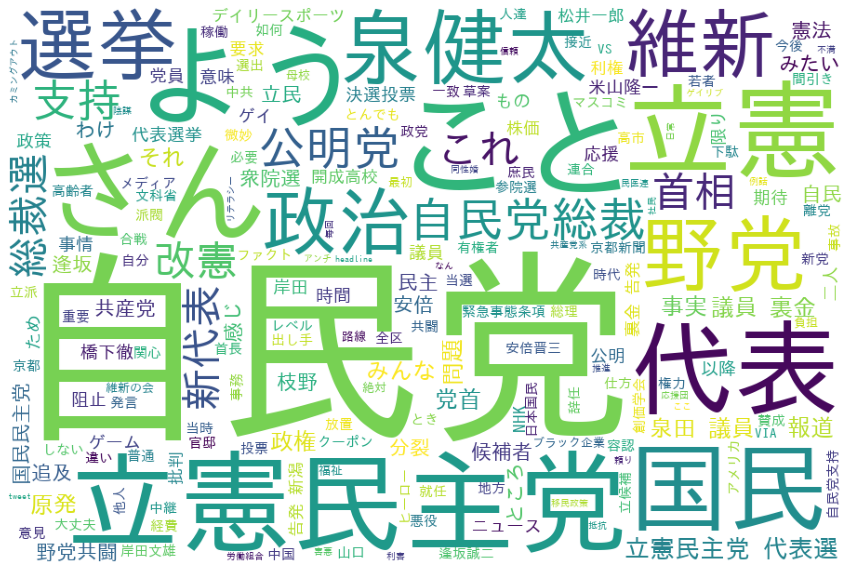

In [445]:
# WordCloudで出力するフォントを指定
font_path = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"

# ストップワードの設定　※これは検索キーワードによって除外したほうがいい単語を設定
stop_words = [ 'https','OracleInnovation' ,'Innovation','Oracle','co','the','of','Summit','Tokyo','Japan','RT',u'説明',u'データ',u'する',u'オラクル',u'日本',u'提供',u'開催',u'お客様']

#解析単語の指定、ストップワードの設定、背景色は白
wordcloud = WordCloud(background_color="white", font_path=font_path, stopwords=set(stop_words),width=900,height=600).generate(words_text)

# ワードクラウドを表示
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### ⑥ ワードカウント（ストップワードのチェック）

In [446]:
from collections import Counter

In [447]:
# Counterの引数はリストを指定！
print(words_list_flat)

['民医連', '共産党系', '移民政策', '推進', '自民党', '共産党', '利害', '一致', 'ゲイ', 'みんな', '同性婚', 'わけ', '事実', 'ゲイ', 'みんな', 'カミングアウト', 'わけ', '事実', 'ゲイ', '自民党支持', '者', '事実', '事実', 'ゲイリブ', 'アンチ', '嘘', '陰謀', '論', 'tweet', 'の', '日常', '維新', '害悪', '信頼', '今', '頼り', '自民党', '維新', '抵抗', '社民', '例話', '応援', '選挙', '毎回', '政治', 'ニュース', 'headline', '政権', '不満', '自民党', '1', '強', '微妙', 'リテラシー', 'レベル', '立憲民主党', '党首', '選', '労働組合', '連合', 'ここ', '政治', '口', 'の', 'なん', '連合', '自民党', '応援団', 'の', '不思議', '共産党', 'の', '口実', '原発', '廃棄', '原発', 'VS', '原発', '村', '自民', '財', '自民党', '組', '陰', '自民党', 'ところ', 'ヒーロー', '悪役', 'こと', '表', 'ヒーロー', 'メディア', '露出', '一枚岩', '的', '感じ', '国民', '期待', '裏', '悪役', '悪巧み', '昔', '人生', 'ゲーム', 'みたい', 'もの', '自民党', '根本的', 'の', '残念', '事実', 'ー', '奴隷', '連鎖', '社畜', '庶民', '洗脳', '教育', 'こと', '生活保護', '時間', '意識', '方', '立憲', 'ところ', '選挙', '原因', '川勝', '県知事', '選挙', '御殿場', '発言', '選挙', '勘弁', '今年', '自民党', 'せい', '選挙', 'この間', '2週', '連続', '選挙', 'の', '前', '県知事選', '自民党', '現役', '国会議員', '出馬', 'ため', '補選', 'オミクロン', '株', '日本初', '確認', '共同通信', '自民党', '六

In [448]:
# 各ワードの出現カウントの数値出力(カンマ区切り)
counter = Counter(words_list_flat)
print(counter)

Counter({'自民党': 86, 'の': 39, '立憲民主党': 20, 'こと': 18, '氏': 18, 'さん': 15, 'よう': 15, '立憲': 13, '議員': 13, '代表': 12, '国民': 11, '泉健太': 10, '野党': 10, '選挙': 9, '選': 9, '泉': 9, '維新': 8, '政治': 8, '方': 8, '自民党総裁': 8, '公明党': 8, '的': 7, 'ん': 7, '代表選': 7, '支持': 7, '人': 7, '改憲': 6, '新代表': 6, '総裁選': 6, 'これ': 6, '首相': 6, '何': 6, '裏金': 6, 'みんな': 5, '事実': 5, '政権': 5, '党首': 5, '原発': 5, '中': 5, '誰': 5, '日本': 5, 'それ': 5, '報道': 5, '万': 5, '問題': 5, 'さ': 5, '２': 5, '泉田': 5, '共産党': 4, 'わけ': 4, '者': 4, '自民': 4, 'ところ': 4, '感じ': 4, 'みたい': 4, '民主': 4, '候補者': 4, '党': 4, '安倍': 4, '派': 4, '立民': 4, '逢坂': 4, '憲法': 4, '野党共闘': 4, '分裂': 4, '国': 4, '国民民主党': 4, '時': 4, '衆院選': 4, '千': 4, '５': 4, '内': 4, '票': 4, '事': 4, '枝野': 4, '追及': 4, 'ゲイ': 3, '今': 3, '応援': 3, 'ニュース': 3, '期待': 3, 'ゲーム': 3, 'もの': 3, '時間': 3, 'ため': 3, '阻止': 3, '二人': 3, '以降': 3, '政策': 3, '橋下徹': 3, '話': 3, '決選投票': 3, '意味': 3, '公明': 3, '限り': 3, '円': 3, '要求': 3, '一': 3, '岸田': 3, '党員': 3, 'NHK': 3, '代表選挙': 3, '３': 3, '米山隆一': 3, '告発': 3, '新潟': 3, '区': 3, '事情': 3, 'デ

In [451]:
# 数値を降順にして、ワードの上位ランキングを数値でもみてみる
print(sorted(counter.items(), key=lambda x:x[1], reverse=True))

[('自民党', 86), ('の', 39), ('立憲民主党', 20), ('こと', 18), ('氏', 18), ('さん', 15), ('よう', 15), ('立憲', 13), ('議員', 13), ('代表', 12), ('国民', 11), ('泉健太', 10), ('野党', 10), ('選挙', 9), ('選', 9), ('泉', 9), ('維新', 8), ('政治', 8), ('方', 8), ('自民党総裁', 8), ('公明党', 8), ('的', 7), ('ん', 7), ('代表選', 7), ('支持', 7), ('人', 7), ('改憲', 6), ('新代表', 6), ('総裁選', 6), ('これ', 6), ('首相', 6), ('何', 6), ('裏金', 6), ('みんな', 5), ('事実', 5), ('政権', 5), ('党首', 5), ('原発', 5), ('中', 5), ('誰', 5), ('日本', 5), ('それ', 5), ('報道', 5), ('万', 5), ('問題', 5), ('さ', 5), ('２', 5), ('泉田', 5), ('共産党', 4), ('わけ', 4), ('者', 4), ('自民', 4), ('ところ', 4), ('感じ', 4), ('みたい', 4), ('民主', 4), ('候補者', 4), ('党', 4), ('安倍', 4), ('派', 4), ('立民', 4), ('逢坂', 4), ('憲法', 4), ('野党共闘', 4), ('分裂', 4), ('国', 4), ('国民民主党', 4), ('時', 4), ('衆院選', 4), ('千', 4), ('５', 4), ('内', 4), ('票', 4), ('事', 4), ('枝野', 4), ('追及', 4), ('ゲイ', 3), ('今', 3), ('応援', 3), ('ニュース', 3), ('期待', 3), ('ゲーム', 3), ('もの', 3), ('時間', 3), ('ため', 3), ('阻止', 3), ('二人', 3), ('以降', 3), ('政策', 3), ('橋下徹'

In [452]:
# 適さない単語をリストからカット（NGワードの駆逐）
words_list_flat2 = []
for w in words_list_flat:
    if w not in ['の', 'ん', 'これ', 'さん']:
        words_list_flat2.append(w)

In [453]:
# 各ワードの出現カウントの数値出力(カンマ区切り)
#--> NGワードの駆逐後
counter2 = Counter(words_list_flat2)
print(sorted(counter2.items(), key=lambda x:x[1], reverse=True))

[('自民党', 86), ('立憲民主党', 20), ('こと', 18), ('氏', 18), ('よう', 15), ('立憲', 13), ('議員', 13), ('代表', 12), ('国民', 11), ('泉健太', 10), ('野党', 10), ('選挙', 9), ('選', 9), ('泉', 9), ('維新', 8), ('政治', 8), ('方', 8), ('自民党総裁', 8), ('公明党', 8), ('的', 7), ('代表選', 7), ('支持', 7), ('人', 7), ('改憲', 6), ('新代表', 6), ('総裁選', 6), ('首相', 6), ('何', 6), ('裏金', 6), ('みんな', 5), ('事実', 5), ('政権', 5), ('党首', 5), ('原発', 5), ('中', 5), ('誰', 5), ('日本', 5), ('それ', 5), ('報道', 5), ('万', 5), ('問題', 5), ('さ', 5), ('２', 5), ('泉田', 5), ('共産党', 4), ('わけ', 4), ('者', 4), ('自民', 4), ('ところ', 4), ('感じ', 4), ('みたい', 4), ('民主', 4), ('候補者', 4), ('党', 4), ('安倍', 4), ('派', 4), ('立民', 4), ('逢坂', 4), ('憲法', 4), ('野党共闘', 4), ('分裂', 4), ('国', 4), ('国民民主党', 4), ('時', 4), ('衆院選', 4), ('千', 4), ('５', 4), ('内', 4), ('票', 4), ('事', 4), ('枝野', 4), ('追及', 4), ('ゲイ', 3), ('今', 3), ('応援', 3), ('ニュース', 3), ('期待', 3), ('ゲーム', 3), ('もの', 3), ('時間', 3), ('ため', 3), ('阻止', 3), ('二人', 3), ('以降', 3), ('政策', 3), ('橋下徹', 3), ('話', 3), ('決選投票', 3), ('意味', 3), ('公明

In [454]:
# ワードのリストをスペース区切りで連結
words_text2 = " ".join(words_list_flat2)
words_text2

'民医連 共産党系 移民政策 推進 自民党 共産党 利害 一致 ゲイ みんな 同性婚 わけ 事実 ゲイ みんな カミングアウト わけ 事実 ゲイ 自民党支持 者 事実 事実 ゲイリブ アンチ 嘘 陰謀 論 tweet 日常 維新 害悪 信頼 今 頼り 自民党 維新 抵抗 社民 例話 応援 選挙 毎回 政治 ニュース headline 政権 不満 自民党 1 強 微妙 リテラシー レベル 立憲民主党 党首 選 労働組合 連合 ここ 政治 口 なん 連合 自民党 応援団 不思議 共産党 口実 原発 廃棄 原発 VS 原発 村 自民 財 自民党 組 陰 自民党 ところ ヒーロー 悪役 こと 表 ヒーロー メディア 露出 一枚岩 的 感じ 国民 期待 裏 悪役 悪巧み 昔 人生 ゲーム みたい もの 自民党 根本的 残念 事実 ー 奴隷 連鎖 社畜 庶民 洗脳 教育 こと 生活保護 時間 意識 方 立憲 ところ 選挙 原因 川勝 県知事 選挙 御殿場 発言 選挙 勘弁 今年 自民党 せい 選挙 この間 2週 連続 選挙 前 県知事選 自民党 現役 国会議員 出馬 ため 補選 オミクロン 株 日本初 確認 共同通信 自民党 六 波 幕開け 個人 賛否 改憲派 立憲 意見 賛同 改憲 悪意 出端 自民党 憲法違反 とんでも 改憲 案 阻止 こと 重要 政治 マスク クーポン 立憲 民主 新代表 泉 候補者 中 無難 方 自民党 総裁選 候補者 希望 立憲 民主 逆 誰 党 方針 訳 微妙 感じ 歴史修正 主義 モラハラ 自民党 補完 政党 始まり まし キープ とんでも 大変 こと 日本 選択肢 悲惨 事故 ため 年齢 免許更新 停止 二人 事故 当時 記憶 高齢者 免許 取得 殺人 死刑 二人 人死 GT 安倍晋三 元首相 30日 首相官邸 岸田文雄 首相 面会 自民党 最大 派閥 安倍 派 清和政策研究会 95人 会長 就任 こと 報告 安倍氏 官邸 訪問 昨年9月 首相 辞任 以降 私 特定秘密保護法 賛成 自民党 衆院議員 当選 穴見 陽一 あな よう いち 大分 九州 比 番組 全部 立民 ゴミ 選挙 若者 支持率 問い 若者 政策 たくさん それ 自民党 対抗 勢力 メディア 報道 自分 理解 方 悪因 高市 他 候補者 レベル 議論 自民党総裁 選 w 国民 5 

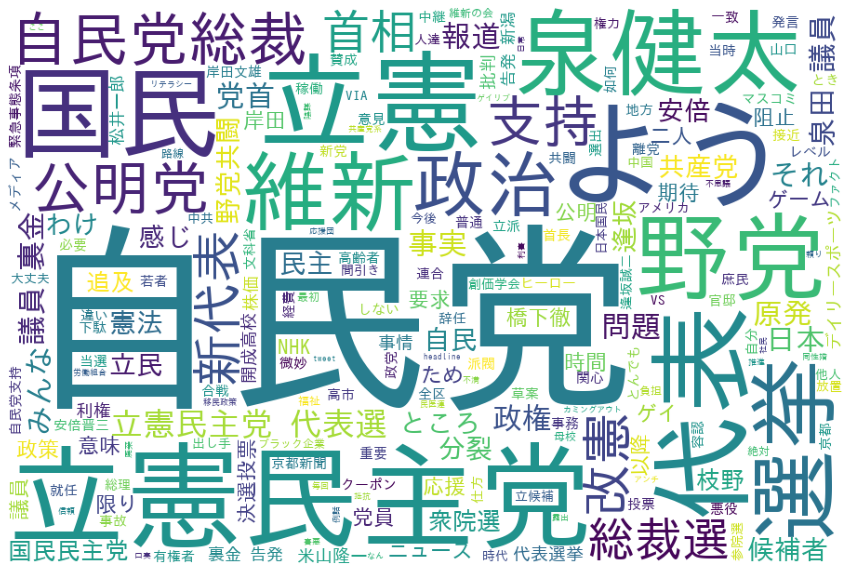

In [455]:
#--> NGワードの駆逐後のワードクラウド
#----> ワードクラウドの表示内容よくなるはず！

# WordCloudで出力するフォントを指定
font_path = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"

# ストップワードの設定　※これは検索キーワードによって除外したほうがいい単語を設定
stop_words = [ 'みたい','もの' ,'こと','なのか','あれ', 'あ', 'とか']

#解析単語の指定、ストップワードの設定、背景色は白
wordcloud = WordCloud(background_color="white", font_path=font_path, stopwords=set(stop_words),width=900,height=600).generate(words_text2)

# ワードクラウドを表示
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## ⑦ 共起ネットワークの作成

### 7-0. 共起データの作成

In [481]:
# Mecabを使用して、形態素解析
import MeCab

# 形態素解析器: ChaSen、辞書: 新語対応で有名なNeologd
# mecab = MeCab.Tagger("-Ochasen")
mecab =MeCab.Tagger('-Ochasen -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')

In [ ]:
# 文単位の名詞リスト
words_list=[]

# 文単位の名詞リストを生成
for sentence in tw_data:
    # print(mecab.parse(sentence))
    # print(mecab.parse(sentence).splitlines())

    sw_list = []
    for v in mecab.parse(sentence).splitlines():
        # print(v.split())
        if (len(v.split())>=3 and v.split()[3][:2]=='名詞'):
            sw_list.append(v.split()[2])
            # print(sw_list)
            
    words_list.append(sw_list)

In [482]:
# 形態素解析の結果として、取得した「文単位の名詞リスト」を確認
print(words_list)

[['民医連', '共産党系', '移民政策', '推進', '自民党', '共産党', '利害', '一致'], ['ゲイ', 'みんな', '同性婚', 'わけ', '事実', 'ゲイ', 'みんな', 'カミングアウト', 'わけ', '事実', 'ゲイ', '自民党支持', '者', '事実', '事実', 'ゲイリブ', 'アンチ', '嘘', '陰謀', '論', 'tweet', 'の'], ['日常', '維新', '害悪', '信頼', '今', '頼り', '自民党', '維新', '抵抗', '社民', '例話', '応援'], ['選挙', '毎回', '政治', 'ニュース', 'headline', '政権', '不満', '自民党', '1', '強', '微妙', 'リテラシー', 'レベル', '立憲民主党', '党首', '選'], ['労働組合', '連合', 'ここ', '政治', '口', 'の', 'なん', '連合', '自民党', '応援団', 'の', '不思議', '共産党', 'の', '口実', '原発', '廃棄', '原発', 'VS', '原発', '村', '自民', '財'], ['自民党', '組', '陰'], ['自民党', 'ところ', 'ヒーロー', '悪役', 'こと', '表', 'ヒーロー', 'メディア', '露出', '一枚岩', '的', '感じ', '国民', '期待', '裏', '悪役', '悪巧み', '昔'], ['人生', 'ゲーム', 'みたい', 'もの', '自民党', '根本的', 'の', '残念', '事実', 'ー', '奴隷', '連鎖', '社畜', '庶民', '洗脳', '教育', 'こと', '生活保護', '時間'], ['意識', '方', '立憲', 'ところ', '選挙', '原因'], ['川勝', '県知事', '選挙', '御殿場', '発言', '選挙', '勘弁', '今年', '自民党', 'せい', '選挙', 'この間', '2週', '連続', '選挙', 'の', '前', '県知事選', '自民党', '現役', '国会議員', '出馬', 'ため', '補選'], ['オミクロン', '株', '日本初', '確

### 7-1. 共起データの生成

共起データ:  共起単語のペアと出現頻度からなる辞書型オブジェクト

※共起: 対象とする単位（文）の中で単語が共に出現する回数をカウント

In [483]:
import itertools

In [525]:
# 適さない単語をリストからカット（NGワードの駆逐）
words_list2 = []

for s in words_list:
    w_list2 = []
    for w in s:
        # ★WordCloud作成時にチェックしたNGワードを記述
        if w not in ['の', 'ん', 'これ', 'さん', 'みたい','もの' ,'こと','なのか','あれ', 'あ', 'とか']:
            w_list2.append(w)
    words_list2.append(w_list2)

print(words_list2)

[['民医連', '共産党系', '移民政策', '推進', '自民党', '共産党', '利害', '一致'], ['ゲイ', 'みんな', '同性婚', 'わけ', '事実', 'ゲイ', 'みんな', 'カミングアウト', 'わけ', '事実', 'ゲイ', '自民党支持', '者', '事実', '事実', 'ゲイリブ', 'アンチ', '嘘', '陰謀', '論', 'tweet'], ['日常', '維新', '害悪', '信頼', '今', '頼り', '自民党', '維新', '抵抗', '社民', '例話', '応援'], ['選挙', '毎回', '政治', 'ニュース', 'headline', '政権', '不満', '自民党', '1', '強', '微妙', 'リテラシー', 'レベル', '立憲民主党', '党首', '選'], ['労働組合', '連合', 'ここ', '政治', '口', 'なん', '連合', '自民党', '応援団', '不思議', '共産党', '口実', '原発', '廃棄', '原発', 'VS', '原発', '村', '自民', '財'], ['自民党', '組', '陰'], ['自民党', 'ところ', 'ヒーロー', '悪役', '表', 'ヒーロー', 'メディア', '露出', '一枚岩', '的', '感じ', '国民', '期待', '裏', '悪役', '悪巧み', '昔'], ['人生', 'ゲーム', '自民党', '根本的', '残念', '事実', 'ー', '奴隷', '連鎖', '社畜', '庶民', '洗脳', '教育', '生活保護', '時間'], ['意識', '方', '立憲', 'ところ', '選挙', '原因'], ['川勝', '県知事', '選挙', '御殿場', '発言', '選挙', '勘弁', '今年', '自民党', 'せい', '選挙', 'この間', '2週', '連続', '選挙', '前', '県知事選', '自民党', '現役', '国会議員', '出馬', 'ため', '補選'], ['オミクロン', '株', '日本初', '確認', '共同通信', '自民党', '六', '波', '幕開け'], ['個人', '賛否', '改憲派'

In [526]:
# 文単位の 名詞ペアリスト
pair_list = []

# ★文単位の名詞ペアリストを生成
#--> 隣り合った単語の組をデータの単位（2-gram(2単語)）
for n in words_list2:
    # print(n, len(n))
    if len(n) >=2:
        pair_list.append(list(itertools.combinations(n, 2)))

In [527]:
print(pair_list)

[[('民医連', '共産党系'), ('民医連', '移民政策'), ('民医連', '推進'), ('民医連', '自民党'), ('民医連', '共産党'), ('民医連', '利害'), ('民医連', '一致'), ('共産党系', '移民政策'), ('共産党系', '推進'), ('共産党系', '自民党'), ('共産党系', '共産党'), ('共産党系', '利害'), ('共産党系', '一致'), ('移民政策', '推進'), ('移民政策', '自民党'), ('移民政策', '共産党'), ('移民政策', '利害'), ('移民政策', '一致'), ('推進', '自民党'), ('推進', '共産党'), ('推進', '利害'), ('推進', '一致'), ('自民党', '共産党'), ('自民党', '利害'), ('自民党', '一致'), ('共産党', '利害'), ('共産党', '一致'), ('利害', '一致')], [('ゲイ', 'みんな'), ('ゲイ', '同性婚'), ('ゲイ', 'わけ'), ('ゲイ', '事実'), ('ゲイ', 'ゲイ'), ('ゲイ', 'みんな'), ('ゲイ', 'カミングアウト'), ('ゲイ', 'わけ'), ('ゲイ', '事実'), ('ゲイ', 'ゲイ'), ('ゲイ', '自民党支持'), ('ゲイ', '者'), ('ゲイ', '事実'), ('ゲイ', '事実'), ('ゲイ', 'ゲイリブ'), ('ゲイ', 'アンチ'), ('ゲイ', '嘘'), ('ゲイ', '陰謀'), ('ゲイ', '論'), ('ゲイ', 'tweet'), ('みんな', '同性婚'), ('みんな', 'わけ'), ('みんな', '事実'), ('みんな', 'ゲイ'), ('みんな', 'みんな'), ('みんな', 'カミングアウト'), ('みんな', 'わけ'), ('みんな', '事実'), ('みんな', 'ゲイ'), ('みんな', '自民党支持'), ('みんな', '者'), ('みんな', '事実'), ('みんな', '事実'), ('みんな', 'ゲイリブ'), ('みんな', 'アンチ'), ('みんな', '嘘'), ('みんな', '陰

In [528]:
# 名詞ペアリストの平坦化
all_pairs = []

for u in pair_list:
    all_pairs.extend(u)

In [529]:
# 名詞ペアの頻度をカウント
cnt_pairs = Counter(all_pairs)
print(cnt_pairs)

Counter({('自民党', '氏'): 10, ('議員', '裏金'): 10, ('ゲイ', '事実'): 9, ('選挙', '自民党'): 9, ('立憲民主党', '氏'): 9, ('泉健太', '氏'): 9, ('立憲民主党', '自民党'): 8, ('みんな', '事実'): 7, ('わけ', '事実'): 7, ('立憲', '自民党'): 7, ('国民', '自民党'): 7, ('立憲民主党', '代表選'): 7, ('立憲民主党', 'よう'): 7, ('立憲民主党', '代表'): 7, ('氏', '氏'): 7, ('代表', '自民党'): 7, ('氏', '自民党'): 7, ('議員', '自民党'): 7, ('野党', '自民党'): 7, ('事実', '事実'): 6, ('自民党', '立憲民主党'): 6, ('連合', '原発'): 6, ('選挙', '選挙'): 6, ('自民党', '自民党'): 6, ('自民党総裁', '選'): 6, ('新代表', '氏'): 6, ('泉', '氏'): 6, ('泉健太', '自民党'): 6, ('立憲民主党', '泉健太'): 6, ('よう', '自民党'): 6, ('千', '万'): 6, ('泉田', '裏金'): 6, ('米山隆一', '議員'): 6, ('議員', '告発'): 6, ('議員', '新潟'): 6, ('議員', '５'): 6, ('議員', '区'): 6, ('議員', '内'): 6, ('議員', '事情'): 6, ('議員', 'よう'): 6, ('議員', 'デイリースポーツ'): 6, ('自民党', '維新'): 5, ('立憲民主党', '選'): 5, ('自民党', '国民'): 5, ('自民党', 'よう'): 5, ('万', '自民党'): 5, ('自民党', '新代表'): 5, ('山口', '代表'): 5, ('代表', '代表'): 5, ('公明党', '自民党'): 5, ('自民党', '議員'): 5, ('泉田', '議員'): 5, ('首相', '開成高校'): 5, ('同性婚', '事実'): 4, ('事実', 'ゲイリブ'): 4, ('

### 7-2. ネットワーク作図用データの作成

In [530]:
import numpy as np

In [531]:
# 作図にあたって見た目を簡潔にするために要素を絞り込む
#--> 出現頻度で上位50組のリストを生成
tops = sorted(cnt_pairs.items(), key=lambda x: x[1], reverse=True)[:50]
tops

[(('自民党', '氏'), 10),
 (('議員', '裏金'), 10),
 (('ゲイ', '事実'), 9),
 (('選挙', '自民党'), 9),
 (('立憲民主党', '氏'), 9),
 (('泉健太', '氏'), 9),
 (('立憲民主党', '自民党'), 8),
 (('みんな', '事実'), 7),
 (('わけ', '事実'), 7),
 (('立憲', '自民党'), 7),
 (('国民', '自民党'), 7),
 (('立憲民主党', '代表選'), 7),
 (('立憲民主党', 'よう'), 7),
 (('立憲民主党', '代表'), 7),
 (('氏', '氏'), 7),
 (('代表', '自民党'), 7),
 (('氏', '自民党'), 7),
 (('議員', '自民党'), 7),
 (('野党', '自民党'), 7),
 (('事実', '事実'), 6),
 (('自民党', '立憲民主党'), 6),
 (('連合', '原発'), 6),
 (('選挙', '選挙'), 6),
 (('自民党', '自民党'), 6),
 (('自民党総裁', '選'), 6),
 (('新代表', '氏'), 6),
 (('泉', '氏'), 6),
 (('泉健太', '自民党'), 6),
 (('立憲民主党', '泉健太'), 6),
 (('よう', '自民党'), 6),
 (('千', '万'), 6),
 (('泉田', '裏金'), 6),
 (('米山隆一', '議員'), 6),
 (('議員', '告発'), 6),
 (('議員', '新潟'), 6),
 (('議員', '５'), 6),
 (('議員', '区'), 6),
 (('議員', '内'), 6),
 (('議員', '事情'), 6),
 (('議員', 'よう'), 6),
 (('議員', 'デイリースポーツ'), 6),
 (('自民党', '維新'), 5),
 (('立憲民主党', '選'), 5),
 (('自民党', '国民'), 5),
 (('自民党', 'よう'), 5),
 (('万', '自民党'), 5),
 (('自民党', '新代表'), 5),
 (('山口', '代表')

In [532]:
noun_1 = []
noun_2 = []
frequency = []

# 重み付きデータの生成
for n,f in tops:
    noun_1.append(n[0])    
    noun_2.append(n[1])
    frequency.append(f)

# データフレームの作成
df = pd.DataFrame({'前出名詞': noun_1, '後出名詞': noun_2, '出現頻度': frequency})

# 重み付きデータの設定（Pandas→Array変換）
weighted_edges = np.array(df)
weighted_edges

array([['自民党', '氏', 10],
       ['議員', '裏金', 10],
       ['ゲイ', '事実', 9],
       ['選挙', '自民党', 9],
       ['立憲民主党', '氏', 9],
       ['泉健太', '氏', 9],
       ['立憲民主党', '自民党', 8],
       ['みんな', '事実', 7],
       ['わけ', '事実', 7],
       ['立憲', '自民党', 7],
       ['国民', '自民党', 7],
       ['立憲民主党', '代表選', 7],
       ['立憲民主党', 'よう', 7],
       ['立憲民主党', '代表', 7],
       ['氏', '氏', 7],
       ['代表', '自民党', 7],
       ['氏', '自民党', 7],
       ['議員', '自民党', 7],
       ['野党', '自民党', 7],
       ['事実', '事実', 6],
       ['自民党', '立憲民主党', 6],
       ['連合', '原発', 6],
       ['選挙', '選挙', 6],
       ['自民党', '自民党', 6],
       ['自民党総裁', '選', 6],
       ['新代表', '氏', 6],
       ['泉', '氏', 6],
       ['泉健太', '自民党', 6],
       ['立憲民主党', '泉健太', 6],
       ['よう', '自民党', 6],
       ['千', '万', 6],
       ['泉田', '裏金', 6],
       ['米山隆一', '議員', 6],
       ['議員', '告発', 6],
       ['議員', '新潟', 6],
       ['議員', '５', 6],
       ['議員', '区', 6],
       ['議員', '内', 6],
       ['議員', '事情', 6],
       ['議員', 'よう', 6],
       

### 7-3. ネットワーク図の描画

In [533]:
# 可視化ライブラリのインポート
# NetworkX:  Pythonで複雑なネットワークやグラフ構造を作成・操作するためのパッケージ
# --> ネットワーク図:  頂点のことをノード(node)、頂点同士を連結する辺をエッジ(edge)
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline 

In [534]:
# matplotlibを日本語表示に対応させるモジュール
# ネットワーク図のノードのラベルを日本語で表示するために必要（さらに日本語フォントを指定する必要があり）
!pip install japanize_matplotlib 
import japanize_matplotlib

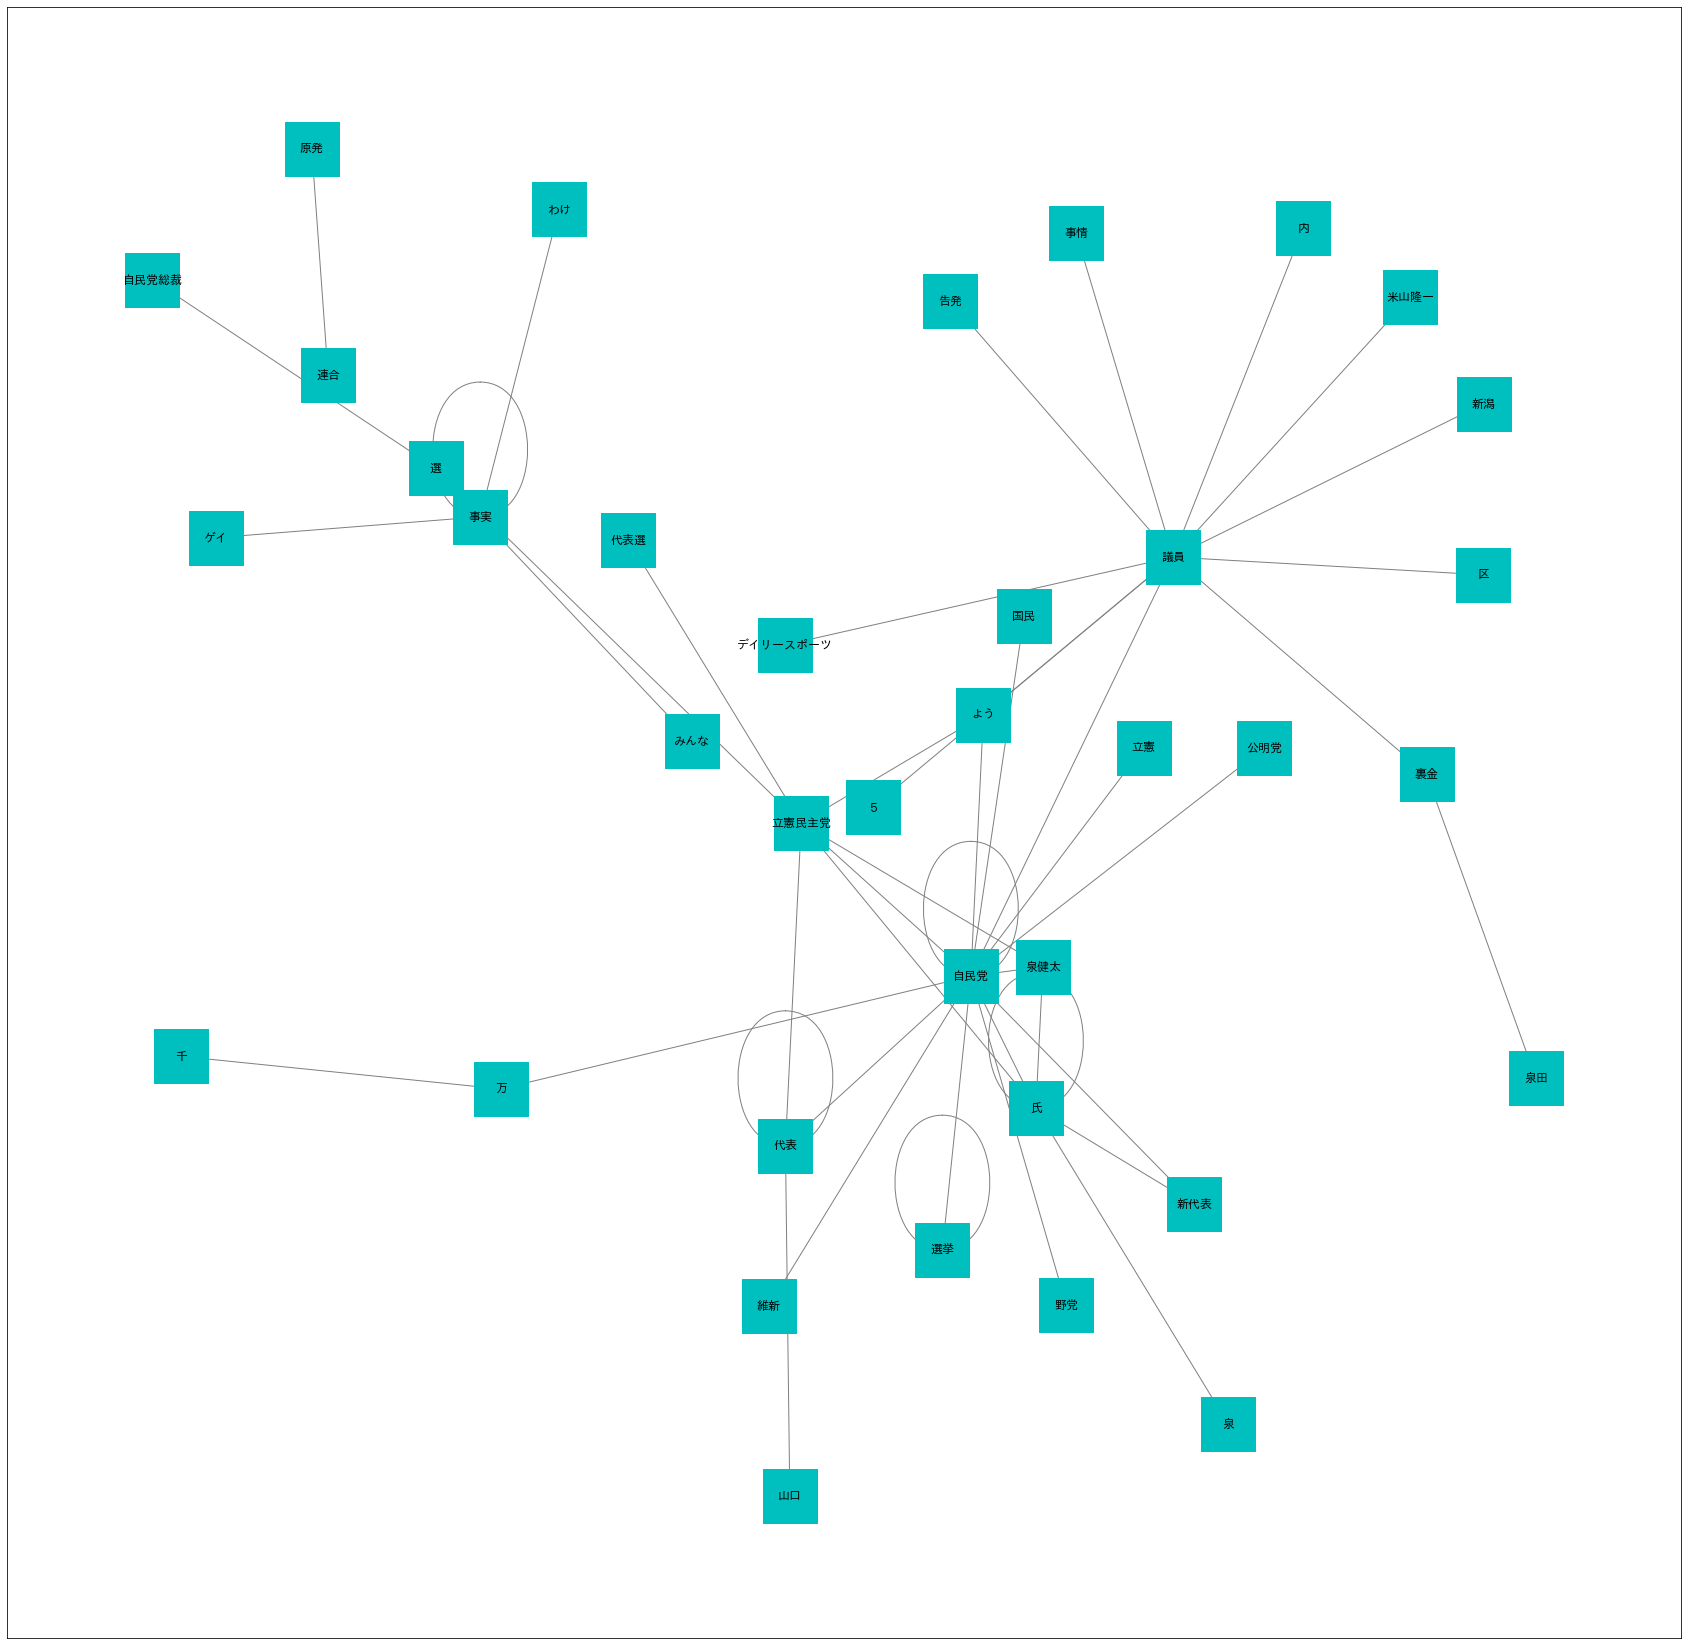

In [536]:
# NetworkXでの可視化
# グラフオブジェクトの生成
G = nx.Graph()

# 重み付きデータの読み込み
G.add_weighted_edges_from(weighted_edges)

# ネットワーク図の描画
plt.figure(figsize=(30,30))

#図のレイアウトを決める。kの値が小さい程図が密集する
pos = nx.spring_layout(G, k=0.9)

nx.draw_networkx(G,
                 pos,
                 with_labels = True, 
                 node_shape = "s",
                 node_color = "c", 
                 node_size = 3000,
                 edge_color = "gray", 
                 font_family = "IPAexGothic") # フォント指定

plt.show()